# Image & Video Technology and Analysis 
## Semester 8 - Spring 2021
## Laboratory Project 1
    Christos Dimopoulos (031 17 037)
    Drosos Lalias (031 17 881)

# 1. Θεωρητικό μέρος

Το θεωρητικό υπόβαθρο της 1ης εργαστηριακής άσκησης καλύπτεται από το άρθρο The Laplacian Pyramid as a Compact Image Code των Burt, P. J. and Adelson, E. H. Με βάση αυτό, απαντάμε στις παρακάτω θεωρητικές ερωτήσεις.

#### <b>α) Ποιο είναι το πρόβλημα και ποιες είναι οι κύριες ιδέες που διαπραγματεύεται το άρθρο αυτό;</b>

Το βασικό πρόβλημα που πραγματεύεται το άρθρο των Burt & Anderson αφορά στην εύρεση μιας υπολογιστικά αποδοτικής τεχνικής κωδικοποίησης εικόνων, στηριζόμενη σε προβλεπτικές τεχνικές και μετασχηματισμούς. Ο αλγόριθμος που προτείνουν συνίσταται αρχικά στην κατασκευή της Gaussian πυραμίδας, η οποία προκύπτει με επαναληπτικά βαθυπερατά φιλτραρίσματα και υποδειγματοληψία με r =2 (πυραμίδα οκτάβας). Λαμβάνοντας τις διαφορές από διαδοχικά επίπεδα της πυραμίδας αυτής, διαδικασία ισοδύναμη αλλά υπολογιστικά φτηνότερη με την εφαρμογή ενός τελεστή Laplace, προκύπτουν τα αποσυσχετισμένα λάθη πρόβλεψης (Laplacian Pyramid), βάσει των οποίων γίνεται η κωδικοποίηση της εικόνας. Για τον σκοπό αυτό, οι συγγραφείς προτείνουν τη χρήση κανονικοποιημένων, συμμετρικών 5x5 Γκαουσσιανών πυρήνων ίσης συνεισφοράς σε pixels, οι οποίοι είναι ιδιαίτερα εύκολο υπολογιστικά να εφαρμοστούν, χρησιμοποιώντας μετατοπίσεις και προσθέσεις. Ομοίως, ορίζεται η ανάστροφη διαδικασία για την ακριβή ανακατασκευή της αρχικής εικόνας εισόδου. Επιπλέον, εισάγοντας το μέγεθος της εντροπίας ως το ελάχιστο πλήθος bits που απαιτούνται για την κωδικοποίηση εικόνας, προτείνεται ως μέθοδος ελάττωσης της η κβάντιση των τιμών pixel της πυραμίδας, χρησιμοποιώντας μεγαλύτερο εύρος τιμών στα υψηλότερα επίπεδα. Τέλος, επισημαίνεται η υπολογιστική υπεροχή της προτεινόμενης μεθόδου και οι επεκτάσεις της σε εφαρμογές, όπως η επεξεργασία, μετάδοση και αναγνώρηση προτύπων σε εικόνες.

#### <b>β) Ποιος είναι ο σκοπός του φίλτρου Gauss στην κατασκευή της πυραμίδας; Τι θα συνέβαινε αν χρησιμοποιήθηκε μόνο υποδειγματοληψία;

H $N$-επιπέδων Gaussian πυραμίδα μιας εικόνας $I$ ορίζεται ως:

\begin{equation}
  \left\{\begin{array}{rcl}
    L^0 & = & I \\
    L^{n+1} & = & \text{REDUCE}(L^n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}


όπου ο τελεστής $\text{REDUCE}(s)$ είναι η συνέλιξη της εικόνας $I$ με τον συμμετρικό πυρήνα $w=\{\frac{1}{16}, \frac{4}{16}, \frac{6}{16}, \frac{4}{16}, \frac{1}{16}\}$ (1D kernel που επεκτείνεται και σε 2D).
Το Γκαουσσιανο αυτό φίλτρο ουσιαστικά κάνει blur τις λεπτομέρειες της εικόνας στην οποία εφαρμόζεται και συνιστά βαθυπερατό φιλτράρισμα. Η διαφορά της αρχικής εικόνας με το αποτέλεσμα της συνέλιξης της με το Gaussian filter δίνει το εκτιμώμενο σφάλμα, το οποίο θα χρησιμοποιηθεί για τη δημιουργία της Laplacian πυραμίδας και εν τέλει την κωδικοποίηση της εικόνας.
<br> <br>
Αν εφαρμόζαμε μόνο υποδειγματοληψία, δίχως την εφαρμογή του φίλτρου, τότε θα υπεισέρχονταν απώλειες πληροφορίας λόγω αναδιπλώσεων (<b>aliasing</b>). Προκειμένου το στάδιο της υποδειγματοληψίας να είναι χωρίς απώλειες (lossless), πρέπει τα μισά στοιχεία υψηλής συχνότητας των  Ln  να μην είναι είναι διαθέσιμα σε  Ln+1 . Ως συνέπεια του αποδεκατισμού, η συνολική ενέργεια των  Ln+1  θα είναι, κατά μέσο όρο, το 1/4 της ενέργειας των  Ln .

#### <b>γ) Πώς χρησιμοποιείται η πυραμίδα Laplacian για την επίλυση του προβλήματος που αναφέρεται στο άρθρο; Γιατί αυτή η αναπαράσταση εικόνας είναι καλύτερη από την πυραμίδα Gauss στο πλαίσιο της εργασίας που διαπραγματεύεται το άρθρο;

H Laplacian πυραμίδα είναι μια ακολουθία από εικόνες σφάλματος L0, L1, ...LN, καθεμία εκ των οποίων είναι η διαφορά ανάμεσα σε δύο διαδοχικά επίπεδα της Gaussian πυραμίδας (Με εξαίρεση το Ν-οστό επίπεδο, όπου LN = gn (n-οστό επίπεδο Γκαουσσιανής Πυραμίδας). Η Λαπλασιανή Πυραμίδα επιλύει το πρόβλημα της κωδικοποίησης εικόνων με χαμηλό υπολογιστικό κόστος, διότι αντί να κωδικοποιούμε την αρχική εικόνα I, κωδικοποιούμε τα εκτιμούμενα σφάλματα Li. Η τεχνική αυτή υπερτερεί διότι:
 - Τα Li είναι σε μεγάλο βαθμό αποσυσχετισμένα, οπότε μπορούν να αναπαρασταθούν pixel προς pixel με λιγότερα bits, απ'ότι η αρχική εικόνα I. <br>
 - Η εικόνα Ln = gn μπορεί να κωδικοποιηθεί με μικρότερο ρυθμό δειγματοληψίας, δεδομένου ότι έχει προέλθει από απανωτά βαθυπερατά φιλτραρίσματα και υποδειγματοληψίες. <br>
 - H τεχνική της Gaussian πυραμίδας έχει χαμηλότερο υπολογιστικό κόστος από την εφαρμογή του τελεστή Laplacian of Gaussian στην αρχική εικόνα.

#### <b>δ) Περιγράψτε πώς να ανακτήσετε την εικόνα χρησιμοποιώντας μόνο την πυραμίδα Laplacian. Διατυπώστε την απάντησή σας χρησιμοποιώντας μια εξίσωση που περιγράφει αυτήν τη διαδικασία. Θα μπορέσουμε να ανακτήσουμε τέλεια την αρχική εικόνα;

Η αρχική εικόνα μπορεί αν ανακτηθεί επακριβώς, επεκετείνοντας και αθροίζοντας όλα τα επίπεδα της Γκαουσσιανής πυραμίδας:
$$I_0=\sum_{i=0}^N L_i$$
Εναλλακτικά, μια πιο αποδοτική προσέγγιση είναι να επεκτείνουμε το εκτιμούμενο σφάλμα Ln μια φορά και να το προσθέσουμε στο Ln-1, ακολούθως να επεκτείνουμε την εικόνα που προκύπτει μια φορά και να την προσθέσουμε στο Ln-2 κ.ο.κ. Η διαδικασία αυτή αναιρεί τα βήματα της παραγωγής της Γκαουσσιανής πυραμίδας και η αρχική εικόνα ανασκευάζεται <b>επακριβώς</b>. 


# 2. Εργαστηριακό Μέρος

### Α. Υλοποίηση Αλγορίθμου

In [ ]:
# Import necessary libraries
import urllib.request
import cv2
import numpy as np
from matplotlib import rcParams, pyplot as plt
from skimage import color, data
from scipy import ndimage as ndi
%matplotlib inline

In [ ]:
# Function that generates 2D kernel
def Gkernel(a):
    b = 0.25
    c = 0.25 - a/2
    kernel1D = np.array([[c], [b], [a], [b], [c]])
    h = kernel1D @ kernel1D.T
    return h

In [ ]:
# Function that convolves input image I with kernel (Gaussian blurring) and undersamples the result by discarding odd rows and lines
def GREDUCE(I, h):
    filtered = cv2.filter2D(I, -1, h)
    I_out = cv2.resize(filtered, (filtered.shape[1]//2, filtered.shape[0]//2), interpolation=cv2.INTER_CUBIC)
    return I_out

Στη συνέχεια, υλοποιούμε τη συνάρτηση <b>GPyramid</b>, η οποία δημιουργεί τη $N$-επιπέδων Gaussian πυραμίδα μιας εικόνας $I$ ως:

\begin{equation}
  \left\{\begin{array}{rcl}
    G^0 & = & I \\
    G^{n+1} & = & \text{REDUCE}(G^n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}

In [ ]:
def GPyramid(I, a, depth):
    G = [I] # g^0 = I (initial image), base of the pyramid
    temp = I
    for i in range(depth-1):
        temp = GREDUCE(temp, Gkernel(a))
        G.append(temp)
    return G

In [ ]:
# Function that oversamples input image I and convolves the result to the 2D symmetric kernel
def GEXPAND(I, h):
    resized = cv2.resize(I, (I.shape[1]*2, I.shape[0]*2), interpolation=cv2.INTER_CUBIC)
    I_out = cv2.filter2D(resized, -1, h)
    return I_out

Ακολούθως, υλοποιούμε τη συνάρτηση <b>L_Pyramid</b>, η οποία χρησιμοποιώντας τη Gaussian Pyramid και τη συνάρτηση EXPAND, δημιουργεί την Laplacian Pyramid μιας εικόνας εισόδου Ι ως:
\begin{equation}
  \left\{\begin{array}{rcl}
    L^{N-1} & = & G^{N-1} \text{ /* the top level of the Gaussian pyramid */}\\
    L^n     & = & G^n - \text{EXPAND}(G^{n+1});~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

In [ ]:
def L_Pyramid(I, a, depth):
    h = Gkernel(a)
    G = GPyramid(I, a, depth)
    L = [G[depth-1]]
    for n in range(depth-1):
        interpolation = GEXPAND(G[depth-n-1], h)
        difference = G[depth-n-2] - interpolation + 128
        L.append(difference)
    L.reverse()
    return L

Ομοίως υλοποιούμε τη συνάρτηση της αντίστροφης διαδικασίας, η οποία δεδομένης μια Laplacian pyramid επιστρέφει την αρχική εικόνα από την οποία προήλθε η πυραμίδα:

In [ ]:
def L_Pyramid_Decode(L,a):
    h = Gkernel(a)
    I_out = L[len(L)-1]
    for n in range(len(L)-1):
        I_out = GEXPAND(I_out, h)
        I_out = I_out + L[len(L)-n-2] - 128
    return I_out

In [ ]:
def quantize(image, bins):
  quanta = np.linspace(0, 255, num = bins) # create bins for 256 pixel values
  rolled_quanta = np.roll(quanta, -1)
  rolled_quanta[-1] = 255 # so that final bin value is 2*255
  output = (np.digitize(image, quanta) + np.digitize(image, rolled_quanta))//2 # each pixel gets the value of the middle of its containing bin
  return output.astype(np.uint8)

def L_Quantization(I, a, depth, bins):
    h = Gkernel(a)
    G = GPyramid(I, a, depth)
    L = [quantize(G[depth-1], bins[depth-1])]
    for n in range(depth-1):
        interpolation = GEXPAND(G[depth-n-1], h)
        difference = G[depth-n-2] - interpolation + 128
        L.append(quantize(difference, bins[depth-n-2])) # quantize each level of the pyamid
    L.reverse()
    return L

### Β. Δοκιμές Αλγορίθμου

In [ ]:
# just to center image depiction 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Text(0.5, 1.0, 'Grayscale Camera Image')

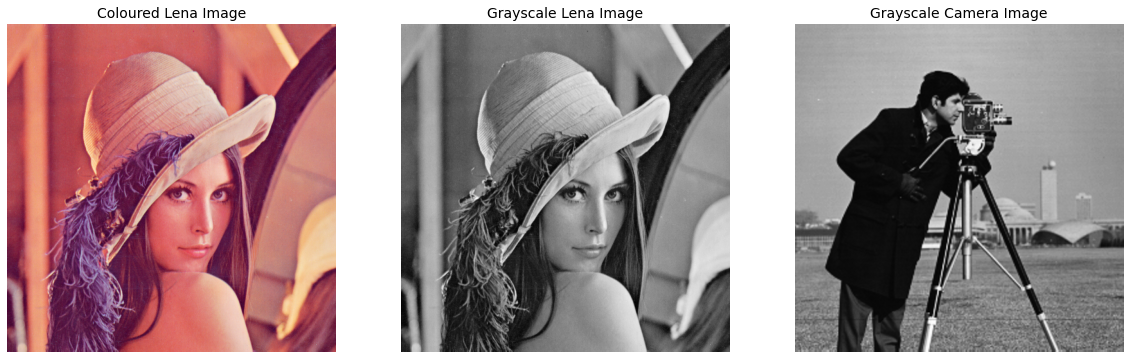

In [ ]:
# Read images Lena and Cameraman
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)

lena_color = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
lena_gray  = cv2.cvtColor(BGR, cv2.COLOR_BGR2GRAY)
camera = data.camera()

# Show input images
rcParams['figure.figsize'] = 20,20
fig, axs = plt.subplots(1,3)
axs[0].axis('off')
axs[0].imshow(lena_color)
axs[0].set_title('Coloured Lena Image', fontsize=14)
axs[1].axis('off')
axs[1].imshow(lena_gray, cmap='gray')
axs[1].set_title('Grayscale Lena Image', fontsize=14)
axs[2].axis('off')
axs[2].imshow(camera, cmap = 'gray')
axs[2].set_title('Grayscale Camera Image', fontsize=14)

(α) Αρχικά, δοκιμάζουμε τις συναρτήσεις L_Pyramid & L_Pyramid_Decode πάνω στις εικόνες Lena (έγχρωμη και γκρίζα) και camera.

In [ ]:
# Check functions L_Pyramid, L_Pyramid_Decode for Grayscale Lena Image

# Functions that plots all levels of Laplacian Pyramid
def plot_pyramid(image, a, depth):
  channels = len(image.shape)
  colors = {0:' RED', 1:'GREEN', 2:'BLUE'}
  if channels == 3: #colored image
    color_pyramids = []
    for i in range(channels):
      pyramid = L_Pyramid(image[:,:,i], a, depth)
      f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))
      title = 'Depth of Pyramid = '+str(depth)+', Parameter a = '+str(a)+' - '+colors[i]+' CHANNEL'
      f.suptitle(title, x=0.5, y=0.6)
      ax0.imshow(pyramid[0].astype(np.uint8)) # Base of the pyramid
      ax0.set_title('L[0]', fontsize=14)
      ax0.axis('off')
      ax1.imshow(pyramid[1].astype(np.uint8))
      ax1.set_title('L[1]', fontsize=14)
      ax1.axis('off')
      ax2.imshow(pyramid[2].astype(np.uint8))
      ax2.set_title('L[2]', fontsize=14)
      ax2.axis('off')
      ax3.imshow(pyramid[3].astype(np.uint8))
      ax3.set_title('L[3]', fontsize=14)
      ax3.axis('off')
      ax4.imshow(pyramid[4].astype(np.uint8))
      ax4.set_title('L[4]', fontsize=14)
      ax4.axis('off')
      color_pyramids.append(pyramid)
    return color_pyramids
  else:
    pyramid = L_Pyramid(image, a, depth)
    f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

    title = 'Depth of Pyramid = '+str(depth)+', Parameter a = '+str(a)
    f.suptitle(title, x=0.5, y=0.6)
    ax0.imshow(pyramid[0], cmap="gray") # Base of the pyramid
    ax0.set_title('L[0]', fontsize=14)
    ax0.axis('off')
    ax1.imshow(pyramid[1], cmap="gray")
    ax1.set_title('L[1]', fontsize=14)
    ax1.axis('off')
    ax2.imshow(pyramid[2], cmap="gray")
    ax2.set_title('L[2]', fontsize=14)
    ax2.axis('off')
    ax3.imshow(pyramid[3], cmap="gray")
    ax3.set_title('L[3]', fontsize=14)
    ax3.axis('off')
    ax4.imshow(pyramid[4], cmap="gray")
    ax4.set_title('L[4]', fontsize=14)
    ax4.axis('off')
  return pyramid


# Function that checks if decoded image is a perfect copy of the original
def compare_to_original(image, pyramid, a):
  channels = len(image.shape)
  rcParams['figure.figsize'] = 6,6
  if channels == 3: # colored images
    retrieved = np.zeros(image.shape)
    for i in range(channels):
      retrieved[:,:,i] = L_Pyramid_Decode(pyramid[i],a)
    plt.imshow(retrieved.astype(np.uint8))
  else:
    retrieved = L_Pyramid_Decode(pyramid, a)
    plt.imshow(retrieved, cmap='gray')
  plt.axis('off')
  if (np.array_equal(retrieved, image)):
    print('Original Image perfectly retrieved!')
  else:
    print('Image Distorted!')
  return retrieved

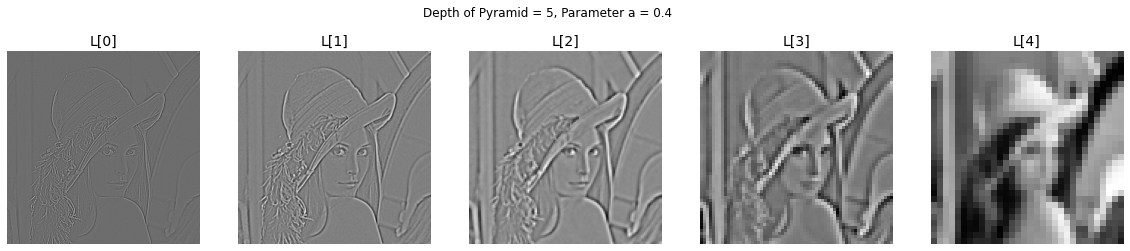

In [ ]:
lena_pyramid = plot_pyramid(lena_gray, a = 0.4, depth = 5)

Original Image perfectly retrieved!


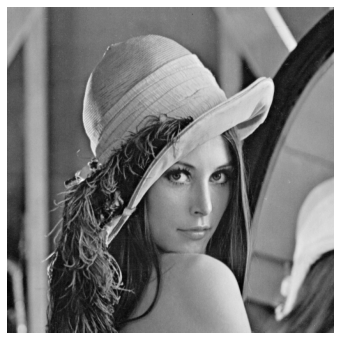

In [ ]:
lena_retrieved = compare_to_original(lena_gray, lena_pyramid, a = 0.4)

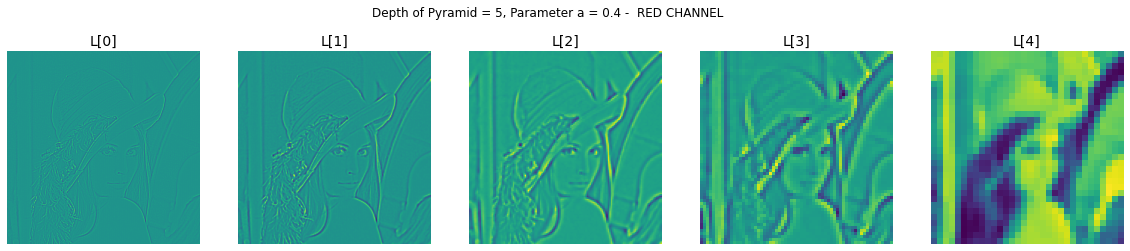

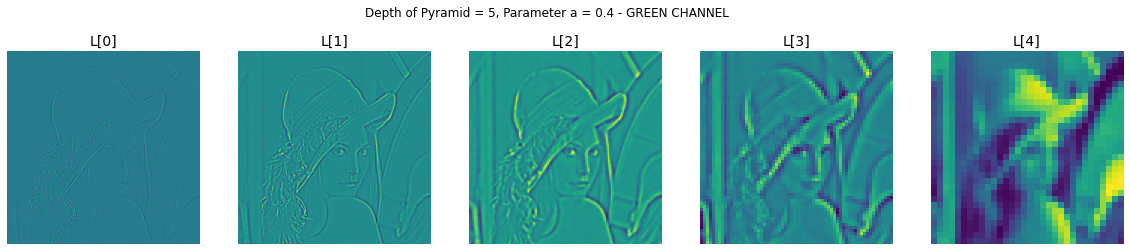

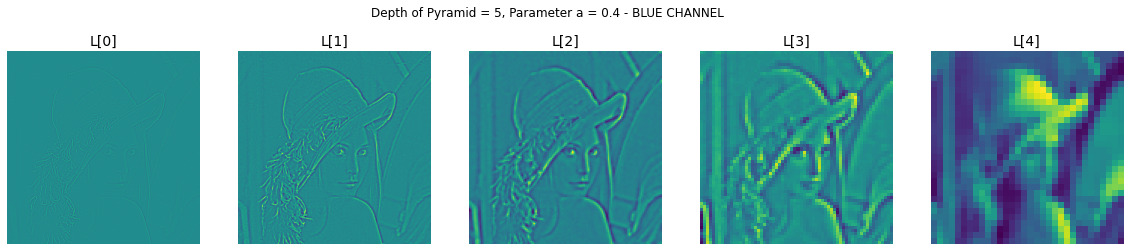

In [ ]:
color_pyramid = plot_pyramid(lena_color, a = 0.4, depth = 5)

Original Image perfectly retrieved!


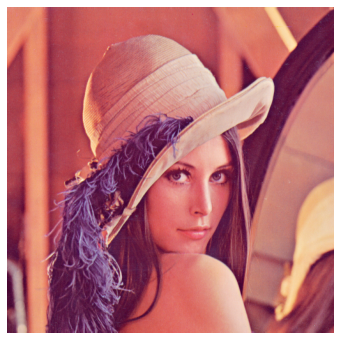

In [ ]:
color_retrieved = compare_to_original(lena_color, color_pyramid, a = 0.4)

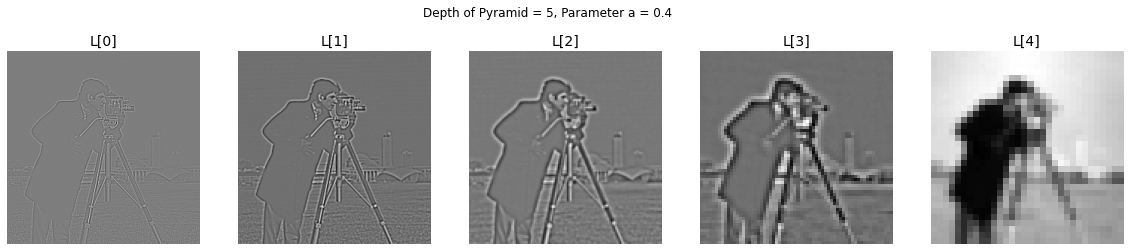

In [ ]:
camera_pyramid = plot_pyramid(camera, a = 0.4, depth = 5)

Original Image perfectly retrieved!


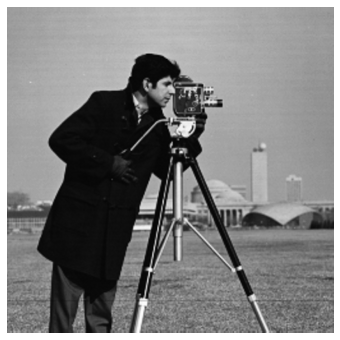

In [ ]:
camera_retrieved = compare_to_original(camera, camera_pyramid, a = 0.4)

Πράγματι, λοιπόν, και οι τρεις εικόνες ανακατασκευάζονται πλήρως με χρήση της Λαπλασιανής Πυραμίδας. Η επιλογή της παραμέτρου α = 0.4 συνεπάγεται με συνέλιξη με Γκαουσσιανό πυρήνα. Παρατηρούμε, επίσης, ότι τα επίπεδα της Λαπλασιανής Πυραμίδας δίνουν εικόνες αντίστοιχες με το αποτέλεσμα συνέλιξης της αρχικής εικόνας με έναν LoG - kernel (Laplacian of Gaussian).

(β) Στη συνέχεια, παρουσιάζουμε τις ανακατασκευασμένες εικόνες για διάφορες τιμές της παραμέτρου α στο διάστημα [0.2, 0.7] σε σύγκριση με την αρχική εικόνα. Σημειώνεται ότι στο εξής θα ασχοληθούμε <b>μόνο με τις γκρίζες εικόνες</b> Lena και camera χάριν απλότητας.

In [ ]:
a_vector = [0.2, 0.3, 0.5, 0.6, 0.7]
depth_vector = [2, 4, 5, 6, 7]

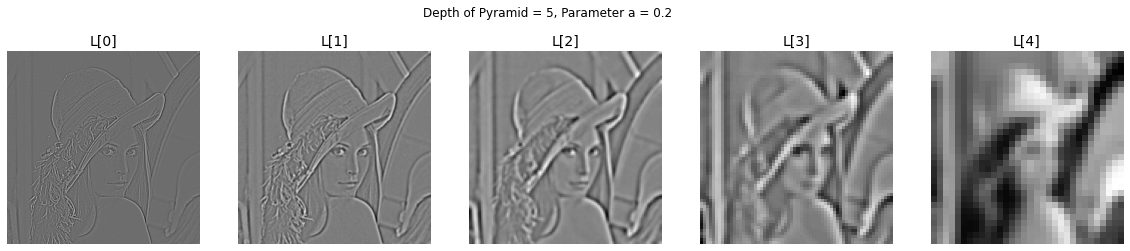

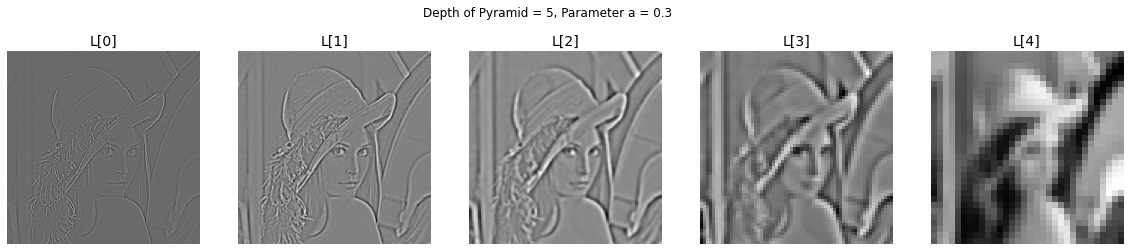

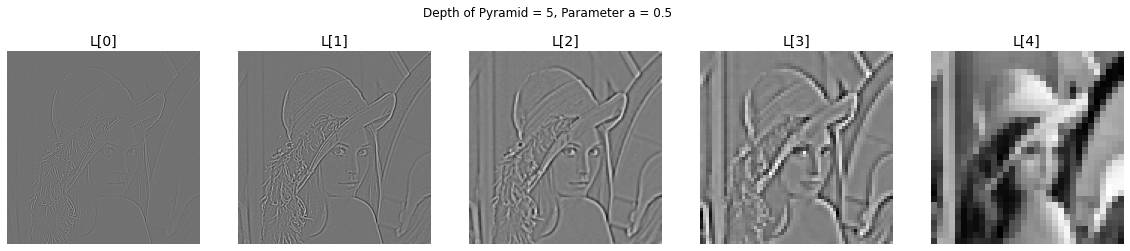

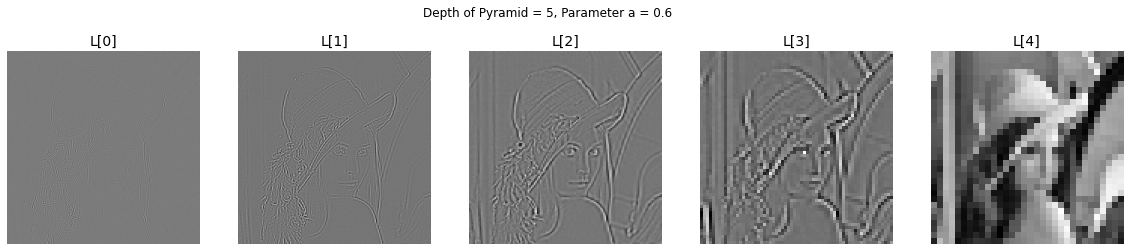

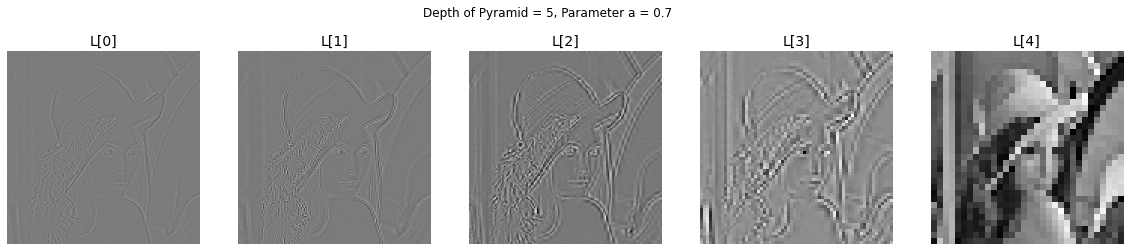

In [ ]:
for a in a_vector:
  lena_pyramid = plot_pyramid(lena_gray, a, depth = 5)

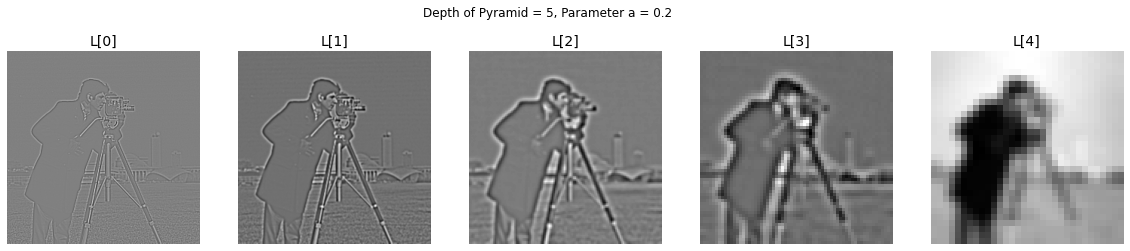

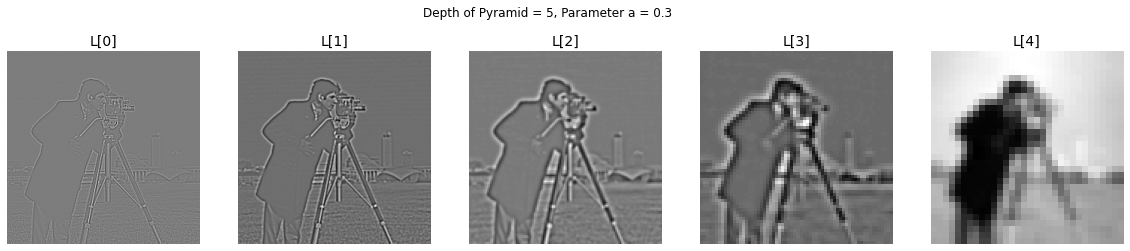

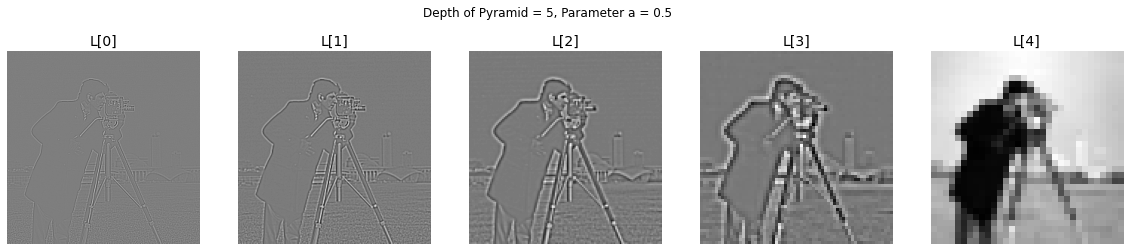

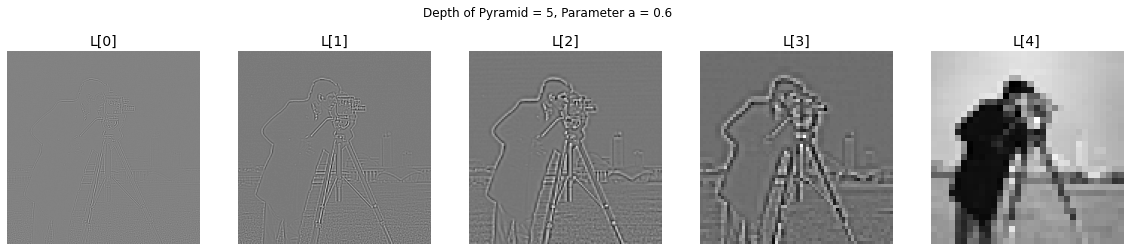

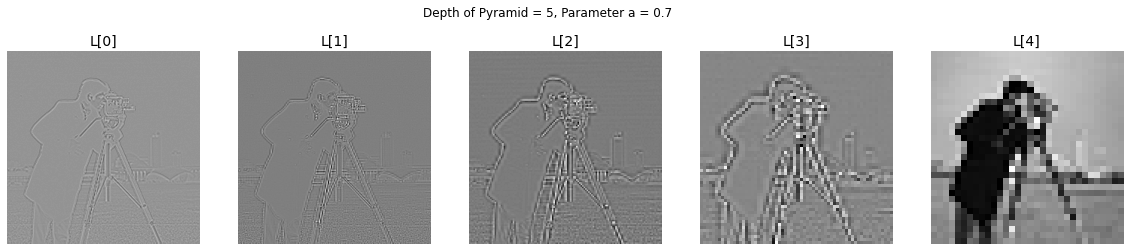

In [ ]:
for a in a_vector:
  camera_pyramid = plot_pyramid(camera, a, depth = 5)

Παρατηρούμε ότι μεγαλύτερες τιμές της παραμέτρου α, οδηγούν σε περισσότερο blurring στα επίπεδα της Λαπλασιανής Πυραμίδας, καθιστώντας δυσδιάκριτες τις λεπτομέρειες της εικόνας που θέλουμε να κωδικοποιήσουμε. Κάτι τέτοιο είναι φυσικό, καθώς το σχήμα της συνάρτησης πυρήνα h εξαρτάται άμεσα από την τιμή της παραμέτρου α (trimodal για α = 0.6, τριγωνικό για α = 0.5, Gaussian για α = 0.4 κλπ). Σημειώνεται δε ότι μεγάλες τιμές του α θολώνουν σχεδόν πλήρως το επίπεδο βάσης της Λαπλασιανής πυραμίδας L0, με αποτέλεσμα η αρχική σιλουέτα της εικόνας να χάνεται στο γκρι φόντο.

(γ) Στη συνέχεια, παρουσιάζουμε τις ανακατασκευασμένες εικόνες για διάφορες τιμές της παραμέτρου βάθους της Λαπλασιανής Πυραμίδας στο διάστημα [2, 7] σε σύγκριση με την αρχική εικόνα. Σε όλες τις περιπτώσεις, επιλέγουμε α = 0.4.

In [ ]:
# Function that plots levels of Gaussian Pyramids for different Depths
def plot_pyramid_depths(image, a, depth):
  pyramid = L_Pyramid(image, a, depth)
  size_dict = {2:6, 4:10, 5:12, 6:14, 7:20}
  f, axs = plt.subplots(1, depth, figsize=(size_dict[depth], size_dict[depth]))
  
  for i in range(depth):
    minititle = 'L['+str(i)+']'
    axs[i].imshow(pyramid[i], cmap="gray") # Base of the pyramid
    axs[i].set_title(minititle, fontsize=14)
    axs[i].axis('off')
  return pyramid

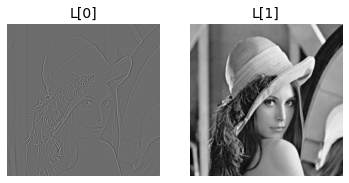

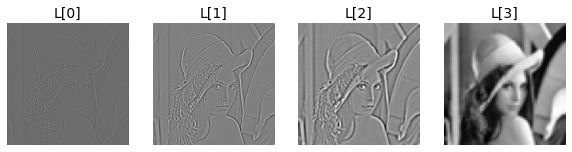

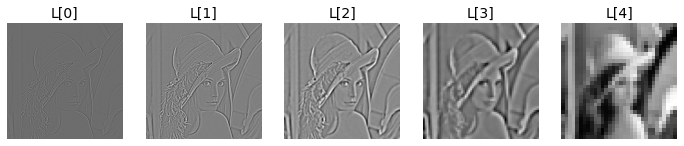

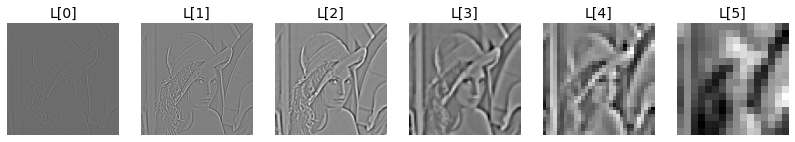

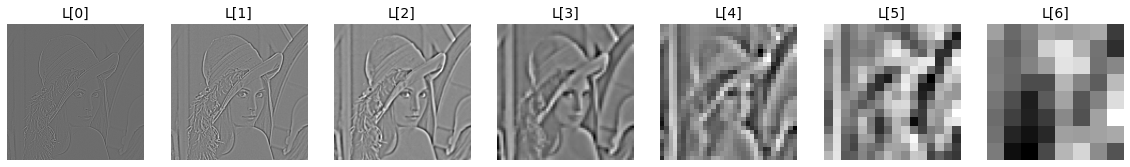

In [ ]:
for depth in depth_vector:
  lena_pyramid = plot_pyramid_depths(lena_gray, 0.4, depth)

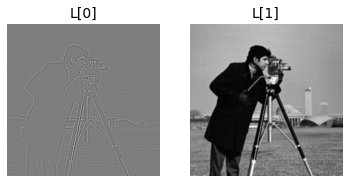

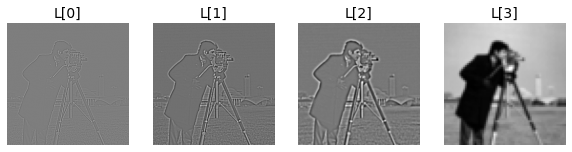

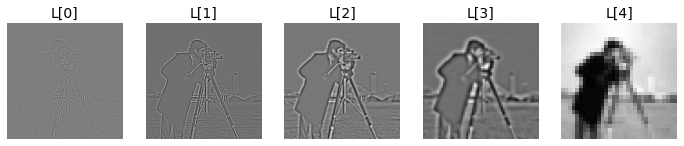

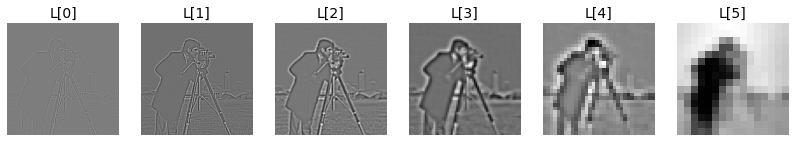

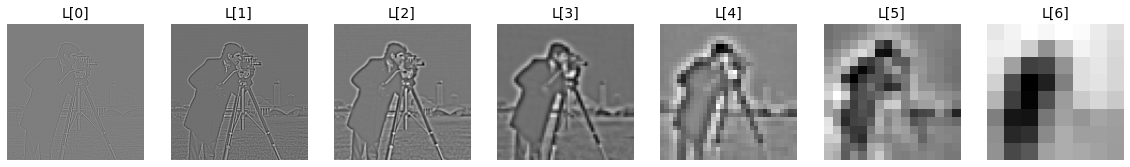

In [ ]:
for depth in depth_vector:
  camera_pyramid = plot_pyramid_depths(camera, 0.4, depth)

(δ) Ακολούθως, υπολογίζουμε την <b>εντροπία</b> και παρουσιάζουμε τα αντίστοιχα διαγράμματα για τα διαφορετικά ‘a’, και ‘depth’.

In [ ]:
# Function that calculates the Histogram of a Laplacian Pyramid of depth N
def histogram(pyramid, N):
  sum_hist = np.zeros([256,1], np.float64)
  for n in range(N):
      hist = cv2.calcHist([pyramid[n]], [0], None, [256], [0, 256])
      sum_hist += hist
  return sum_hist/sum_hist.max() # normalized histogram

import scipy.stats as st

# Function that calculates Entropy of Image given its Histogram
def entropy_calc(histogram):
  return st.entropy(histogram, base = 2)[0]

In [ ]:
# Function that plots histograms of Gaussian Pyramids for different Depths and a parameters
def plot_hist(image, a_vector, depth_vector):
  max_plots = max(len(depth_vector), len(a_vector))
  f, axs = plt.subplots(1, max_plots, figsize=(24, 7))
  count = 0
  for a in a_vector:
    for depth in depth_vector:
        channels = len(image.shape)
        if channels==3: #colored images
          hist = []
          colors = ['r','g','b']
          for i in range(channels):
            pyramid = L_Pyramid(image[:,:,i], a, depth)
            temp = histogram(pyramid, depth)
            axs[count].plot(temp, colors[i])
            hist.append(temp)
          entropy = (entropy_calc(hist[0]) +  entropy_calc(hist[1]) + entropy_calc(hist[2]))/3
        else:
          pyramid = L_Pyramid(image, a, depth)
          hist = histogram(pyramid, depth)
          axs[count].plot(hist)
          entropy = entropy_calc(hist)
        minititle = 'Depth = '+str(depth)+', Parameter a = '+str(a)
        axs[count].set_title(minititle, fontsize=10)
        count = count + 1
        print('Depth = ', depth,', Parameter a = ', a,': Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))
        if count == max_plots:
          print()
          return pyramid, hist, entropy
  return pyramid, hist, entropy

Αρχικά, εστιάζουμε στην γκρίζα εικόνα της Lena.

--------- Grayscale Lena Image - Entropy for Different a -----------

Depth =  5 , Parameter a =  0.2 : Entropy =  4.8557 , Variance of Histogram =  0.0153
Depth =  5 , Parameter a =  0.3 : Entropy =  4.7233 , Variance of Histogram =  0.0147
Depth =  5 , Parameter a =  0.5 : Entropy =  4.343 , Variance of Histogram =  0.0133
Depth =  5 , Parameter a =  0.6 : Entropy =  4.177 , Variance of Histogram =  0.0136
Depth =  5 , Parameter a =  0.7 : Entropy =  4.2843 , Variance of Histogram =  0.0147



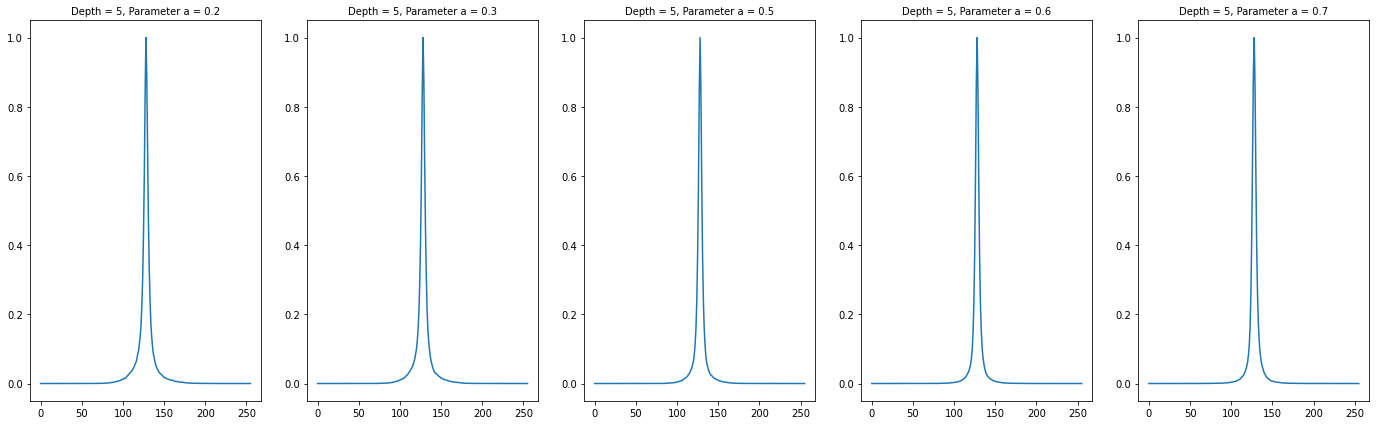

In [ ]:
print('--------- Grayscale Lena Image - Entropy for Different a -----------')
print()
lena_pyr, lena_hist, entropy = plot_hist(lena_gray, a_vector, depth_vector = [5])

--------- Grayscale Lena Image - Entropy for Different Depths -----------

Depth =  2 , Parameter a =  0.4 : Entropy =  5.4403 , Variance of Histogram =  0.0163
Depth =  4 , Parameter a =  0.4 : Entropy =  4.5878 , Variance of Histogram =  0.0142
Depth =  5 , Parameter a =  0.4 : Entropy =  4.553 , Variance of Histogram =  0.0142
Depth =  6 , Parameter a =  0.4 : Entropy =  4.5467 , Variance of Histogram =  0.0142
Depth =  7 , Parameter a =  0.4 : Entropy =  4.5458 , Variance of Histogram =  0.0142



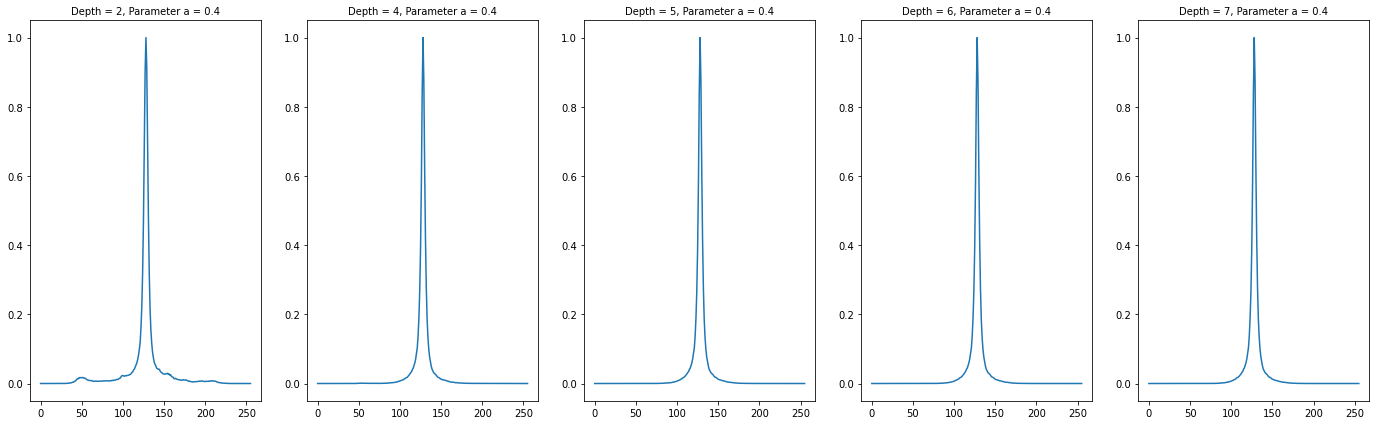

In [ ]:
print('--------- Grayscale Lena Image - Entropy for Different Depths -----------')
print()
lena_pyr, lena_hist, entropy = plot_hist(lena_gray, [0.4], depth_vector)

Ομοίως, επαναλαμβάνουμε την ίδια διαδικασία για την έγχρωμη εικόνα Lena.

--------- Colored Lena Image - Entropy for Different a -----------

Depth =  5 , Parameter a =  0.2 : Entropy =  4.9353 , Variance of Histogram =  0.0184
Depth =  5 , Parameter a =  0.3 : Entropy =  4.8213 , Variance of Histogram =  0.0176
Depth =  5 , Parameter a =  0.5 : Entropy =  4.4996 , Variance of Histogram =  0.0169
Depth =  5 , Parameter a =  0.6 : Entropy =  4.3601 , Variance of Histogram =  0.0174
Depth =  5 , Parameter a =  0.7 : Entropy =  4.4507 , Variance of Histogram =  0.0191



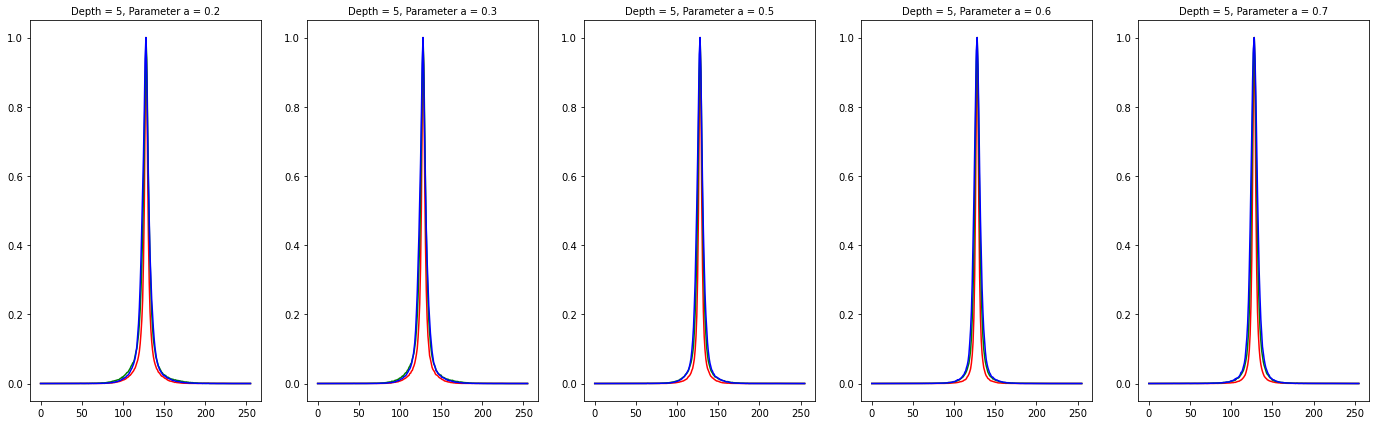

In [ ]:
print('--------- Colored Lena Image - Entropy for Different a -----------')
print()
color_pyr, color_hist, entropy = plot_hist(lena_color, a_vector, depth_vector = [5])

--------- Colored Lena Image - Entropy for Different Depths -----------

Depth =  2 , Parameter a =  0.4 : Entropy =  5.5973 , Variance of Histogram =  0.0216
Depth =  4 , Parameter a =  0.4 : Entropy =  4.7191 , Variance of Histogram =  0.0171
Depth =  5 , Parameter a =  0.4 : Entropy =  4.6754 , Variance of Histogram =  0.0171
Depth =  6 , Parameter a =  0.4 : Entropy =  4.666 , Variance of Histogram =  0.0171
Depth =  7 , Parameter a =  0.4 : Entropy =  4.6638 , Variance of Histogram =  0.0171



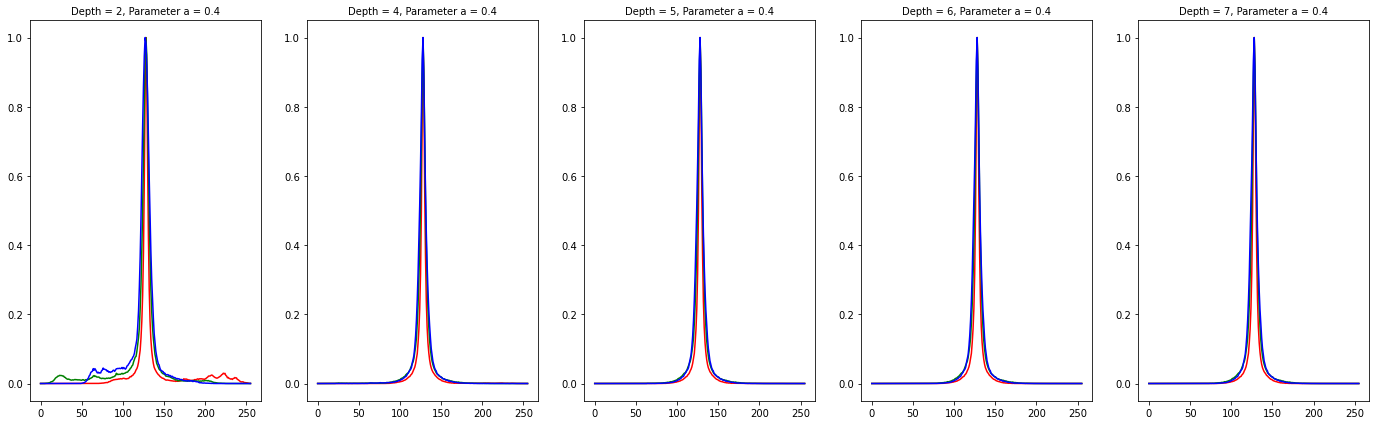

In [ ]:
print('--------- Colored Lena Image - Entropy for Different Depths -----------')
print()
color_pyr, color_hist, entropy = plot_hist(lena_color, [0.4], depth_vector)

Τέλος, επαναλαμβάνουμε την ίδια διαδικασία για την γκρίζα εικόνα του cameraman.

--------- Grayscale Camera Image - Entropy for Different a -----------

Depth =  5 , Parameter a =  0.2 : Entropy =  4.5197 , Variance of Histogram =  0.0083
Depth =  5 , Parameter a =  0.3 : Entropy =  4.3612 , Variance of Histogram =  0.0079
Depth =  5 , Parameter a =  0.5 : Entropy =  3.8643 , Variance of Histogram =  0.0066
Depth =  5 , Parameter a =  0.6 : Entropy =  3.554 , Variance of Histogram =  0.0061
Depth =  5 , Parameter a =  0.7 : Entropy =  3.7119 , Variance of Histogram =  0.0063



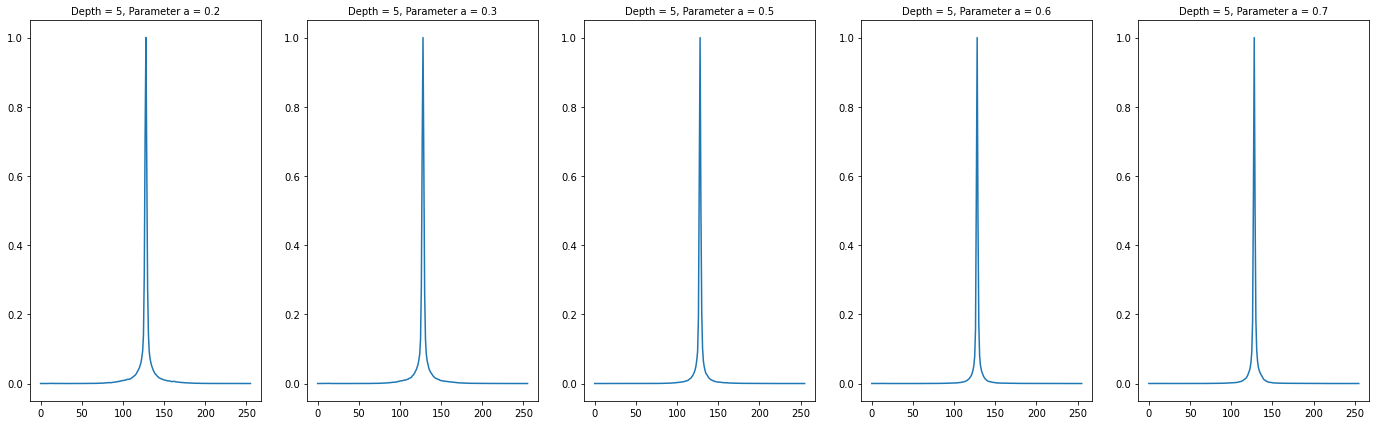

In [ ]:
print('--------- Grayscale Camera Image - Entropy for Different a -----------')
print()
camera_pyr, camera_hist, entropy = plot_hist(camera, a_vector, depth_vector = [5])

--------- Grayscale Camera Image - Entropy for Different Depths -----------

Depth =  2 , Parameter a =  0.4 : Entropy =  5.0298 , Variance of Histogram =  0.0073
Depth =  4 , Parameter a =  0.4 : Entropy =  4.1924 , Variance of Histogram =  0.0073
Depth =  5 , Parameter a =  0.4 : Entropy =  4.1487 , Variance of Histogram =  0.0073
Depth =  6 , Parameter a =  0.4 : Entropy =  4.1391 , Variance of Histogram =  0.0073
Depth =  7 , Parameter a =  0.4 : Entropy =  4.1374 , Variance of Histogram =  0.0073



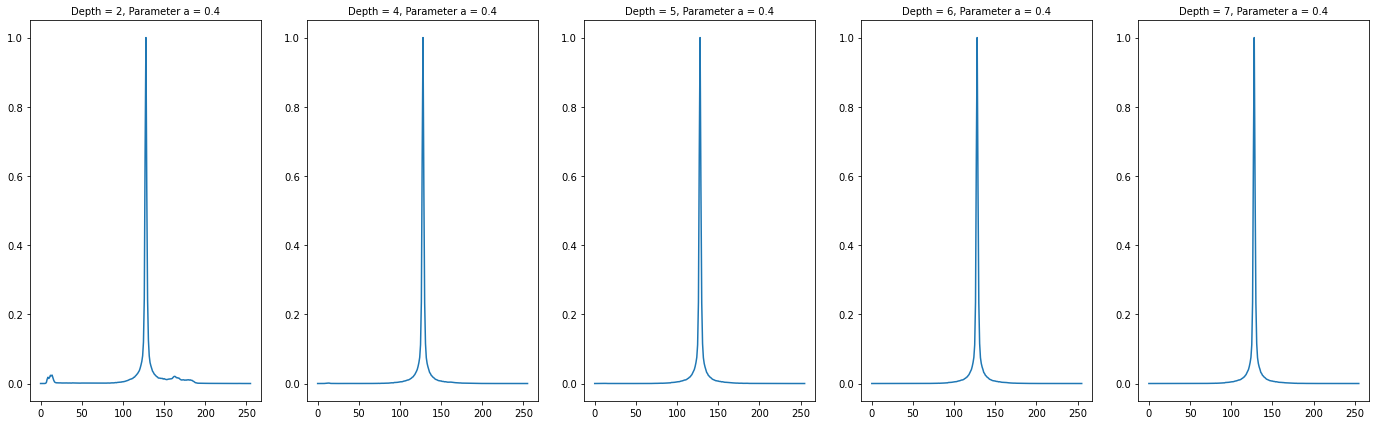

In [ ]:
print('--------- Grayscale Camera Image - Entropy for Different Depths -----------')
print()
camera_pyr, camera_hist, entropy = plot_hist(camera, [0.4], depth_vector)

Παρατηρούμε ότι καθώς αυξάνεται η τιμή της παραμέτρου α, η εντροπία της εικόνας μειώνεται και το αντίστοιχο ιστόγραμμα κατανομής τιμών των pixel "στενεύει" περισσότερο, γεγονός που υποδηλώνει κωδικοποίηση σε λιγότερα bits (Η χαμηλότερη τιμή της εντοπίζεται για α = 0.6 και για τις δύο εικόνες). Αντιθέτως, όσο περισσότερα επίπεδα έχει η Λαπλασιανή Πυραμίδα, τόσο μεγαλύτερη γίνεται η τιμή της εντροπίας και τόσο πιο "απλωμένο" το ιστόγραμμα τιμών. <br>
Επομένως, καλούμαστε να επιτύχουμε την ελάχιστη τιμή εντροπίας, πειραματιζόμενοι με μεγάλες τιμές της παραμέτρου α και λίγα επίπεδα βάθους της Laplacian πυραμίδας.


(ε) Έχοντας δοκιμάσει διαφορερικές τιμές των παραμέτρων α και βάθους της πυραμίδας, καλούμαστε πλέον να προσδιορίσουμε τη βέλτιστη τιμή της παραμέτρου α, για την οποία η εντροπία λαμβάνει τη χαμηλότερη τιμή και η διακύμανση των τιμών των εικονοστοιχείων σε κάθε επίπεδο της πυραμίδας Laplacian στενεύει ως ένα peak στον χώρο των 256 τιμών. Διατηρούμε το βάθος της Λαπλασιανής Πυραμίδας σταθερό και ίσο με την τιμή  **depth = 5**. <br>

In [ ]:
# Function that prints Entropy and Variance for each Level of Laplacian Pyramid
def print_per_level(image, a,  N):
  pyramid = L_Pyramid(image, a, N)
  for n in range(N):
      hist = cv2.calcHist([pyramid[n]], [0], None, [256], [0, 256])
      print('Depth Level = ', n+1,': Entropy = ', entropy_calc(hist), ', Variance = ', np.var(hist))

def print_per_a(image, a_vector, depth):
  for a in a_vector:
    print('Parameter a = ', a)
    print_per_level(image, a, depth)
    print()


In [ ]:
print('--------------- Grayscale Lena Image --------------- \n')
print_per_a(lena_gray, a_vector, 5)
print('--------------- Colour Lena Image ---------------\n')
print_per_a(lena_color, a_vector, 5)
print('--------------- Grayscale Camera Image ---------------\n')
print_per_a(camera, a_vector, 5)

--------------- Grayscale Lena Image --------------- 

Parameter a =  0.2
Depth Level =  1 : Entropy =  4.7748456 , Variance =  14946503.0
Depth Level =  2 : Entropy =  4.79679 , Variance =  1053100.4
Depth Level =  3 : Entropy =  5.3959146 , Variance =  36144.156
Depth Level =  4 : Entropy =  5.9075956 , Variance =  1137.8281
Depth Level =  5 : Entropy =  6.979996 , Variance =  21.3125

Parameter a =  0.3
Depth Level =  1 : Entropy =  4.638189 , Variance =  16261402.0
Depth Level =  2 : Entropy =  4.6708107 , Variance =  1164667.8
Depth Level =  3 : Entropy =  5.2575674 , Variance =  42235.72
Depth Level =  4 : Entropy =  5.824477 , Variance =  1274.4922
Depth Level =  5 : Entropy =  7.0085936 , Variance =  20.921875

Parameter a =  0.5
Depth Level =  1 : Entropy =  4.228498 , Variance =  20756684.0
Depth Level =  2 : Entropy =  4.349 , Variance =  1455895.6
Depth Level =  3 : Entropy =  4.941927 , Variance =  57393.664
Depth Level =  4 : Entropy =  5.5772314 , Variance =  1865.5781
D

Παρατηρούμε ότι κατά μέσο όρο για κάθε επίπεδο της Λαπλασιανής Πυραμίδας, η ελάχιστη εντροπία επιτυγχάνεται για α = 0.6 (σε ελάχιστε μόνο περιπτώσεις επιτυγχάνεται για α = 0.5). Επομένως, και για τις δύο εικόνες, Lena και cameraman, καταλήγουμε στο συμπέρασμα ότι το βέλτιστο αποτέλεσμα κωδικοποίησης δίνεται για περίπου **α = 0.6**.  Παρατίθενται ακολούθως οι τιμές της εντροπίας για τις δύο εικόνες Lena και Camera, δεδομένων των παραμέτρων που αναφέρθηκαν:

 - ***Γκρίζα Εικόνα Lena:*** <br>
Lowest Entropy = 4.177, Variance of Histogram = 0.0136
 - ***Έγχρωμη Εικόνα Lena:*** <br>
Lowest Entropy = 4.3601 , Variance of Histogram = 0.0174
 - ***Γκρίζα Εικόνα Camera:*** <br>
Lowest Entropy = 3.554, Variance of Histogram = 0.0061

(στ) Ακολούθως, για την βέλτιστη τιμή α = 0.6, κβαντίζουμε τις εικόνες Lena και
camera χρησιμοποιώντας διαφορετικά bin size.

In [ ]:
# Functions that plots all levels of Laplacian Pyramid
def plot_quantized_pyramid(image, a, depth, bins):
  channels = len(image.shape)
  colors = {0:' RED', 1:'GREEN', 2:'BLUE'}
  if channels == 3: #colored image
    color_pyramids = []
    for i in range(channels):
      pyramid = L_Quantization(image[:,:,i], a, depth, bins)
      f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))
      title = 'Depth of Pyramid = '+str(depth)+', Parameter a = '+str(a)+' - '+colors[i]+' CHANNEL'
      f.suptitle(title, x=0.5, y=0.6)
      ax0.imshow(pyramid[0].astype(np.uint8)) # Base of the pyramid
      ax0.set_title('L[0]', fontsize=14)
      ax0.axis('off')
      ax1.imshow(pyramid[1].astype(np.uint8))
      ax1.set_title('L[1]', fontsize=14)
      ax1.axis('off')
      ax2.imshow(pyramid[2].astype(np.uint8))
      ax2.set_title('L[2]', fontsize=14)
      ax2.axis('off')
      ax3.imshow(pyramid[3].astype(np.uint8))
      ax3.set_title('L[3]', fontsize=14)
      ax3.axis('off')
      ax4.imshow(pyramid[4].astype(np.uint8))
      ax4.set_title('L[4]', fontsize=14)
      ax4.axis('off')
      color_pyramids.append(pyramid)
    return color_pyramids
  else:
    pyramid = L_Quantization(image, a, depth, bins)
    f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

    title = 'Depth of Pyramid = '+str(depth)+', Parameter a = '+str(a) +', No of Bins = '+str(bins)
    f.suptitle(title, x=0.5, y=0.6)
    ax0.imshow(pyramid[0], cmap="gray") # Base of the pyramid
    ax0.set_title('L[0]', fontsize=14)
    ax0.axis('off')
    ax1.imshow(pyramid[1], cmap="gray")
    ax1.set_title('L[1]', fontsize=14)
    ax1.axis('off')
    ax2.imshow(pyramid[2], cmap="gray")
    ax2.set_title('L[2]', fontsize=14)
    ax2.axis('off')
    ax3.imshow(pyramid[3], cmap="gray")
    ax3.set_title('L[3]', fontsize=14)
    ax3.axis('off')
    ax4.imshow(pyramid[4], cmap="gray")
    ax4.set_title('L[4]', fontsize=14)
    ax4.axis('off')
    return pyramid

Αρχικά, κβαντίζουμε τα επίπεδια της Λαπλασιανής Πυραμίδας για την γκρίζα εικόνα της Lena.

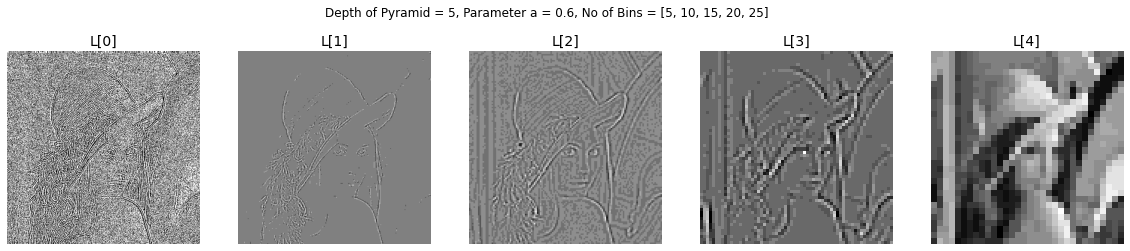

In [ ]:
lena_experiments = []
bins1 = [5, 10, 15, 20, 25]
quant_lena_pyr1 = plot_quantized_pyramid(image = lena_gray, a = 0.6, depth = 5, bins = bins1)

Image Distorted!
Quantizing with 5 bins:  Entropy =  1.9659 , Variance of Histogram =  0.0067


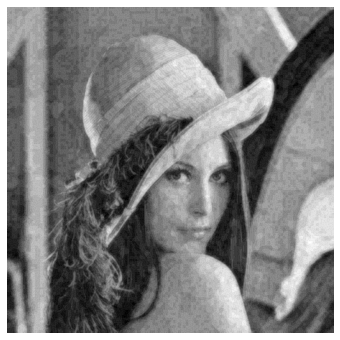

In [ ]:
retrieved_lena1 = compare_to_original(lena_gray, quant_lena_pyr1, a = 0.6)
lena_experiments.append(retrieved_lena1)

hist = histogram(quant_lena_pyr1, 5)
entropy = entropy_calc(hist)
print('Quantizing with 5 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

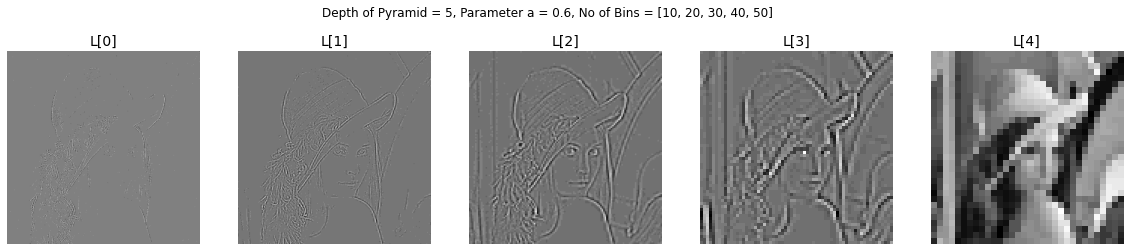

In [ ]:
bins2 = [10, 20, 30, 40, 50]
quant_lena_pyr2 = plot_quantized_pyramid(image = lena_gray, a = 0.6, depth = 5, bins = bins2)

Image Distorted!
Quantizing with 25 bins:  Entropy =  1.5151 , Variance of Histogram =  0.0041


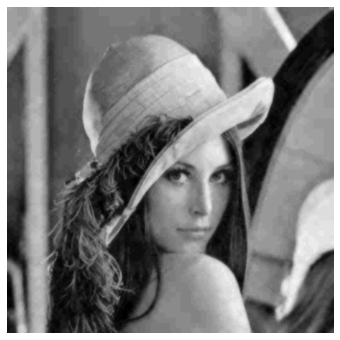

In [ ]:
retrieved_lena2 = compare_to_original(lena_gray, quant_lena_pyr2, a = 0.6)
lena_experiments.append(retrieved_lena2)

hist = histogram(quant_lena_pyr2, 5)
entropy = entropy_calc(hist)
print('Quantizing with 25 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

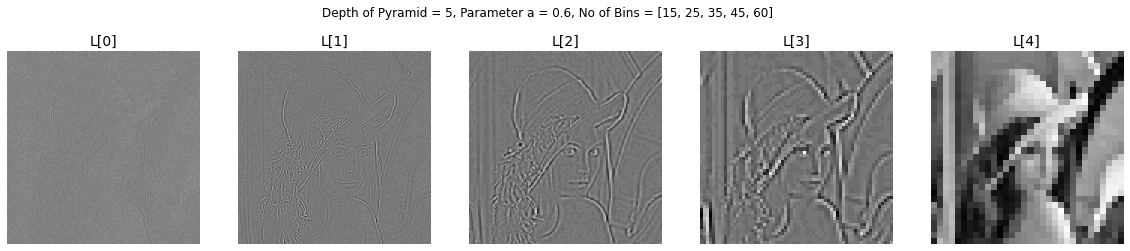

In [ ]:
bins3 = [15, 25, 35, 45, 60]
quant_lena_pyr3 = plot_quantized_pyramid(image = lena_gray, a = 0.6, depth = 5, bins = bins3)

Image Distorted!
Quantizing with 50 bins:  Entropy =  2.2935 , Variance of Histogram =  0.0064


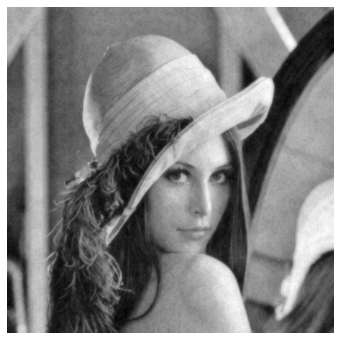

In [ ]:
retrieved_lena3 = compare_to_original(lena_gray, quant_lena_pyr3, a = 0.6)
lena_experiments.append(retrieved_lena3)

hist = histogram(quant_lena_pyr3, 5)
entropy = entropy_calc(hist)
print('Quantizing with 50 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

Ομοίως, για την έγχρωμη εικόνα της Lena:

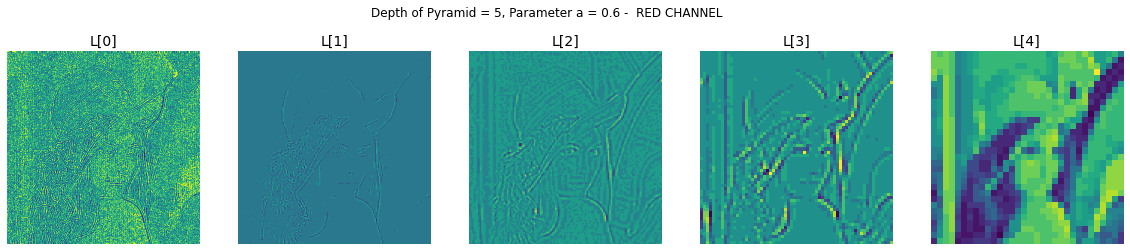

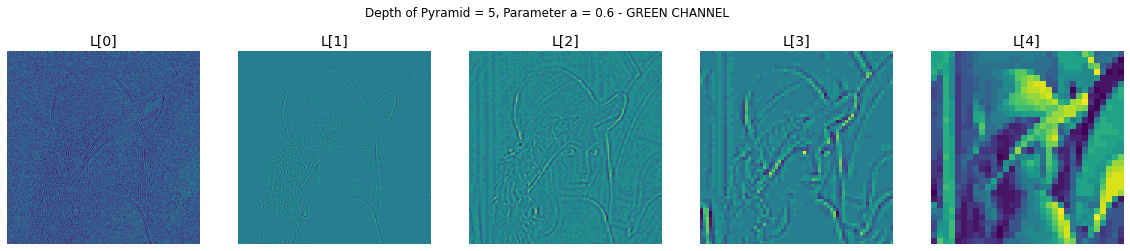

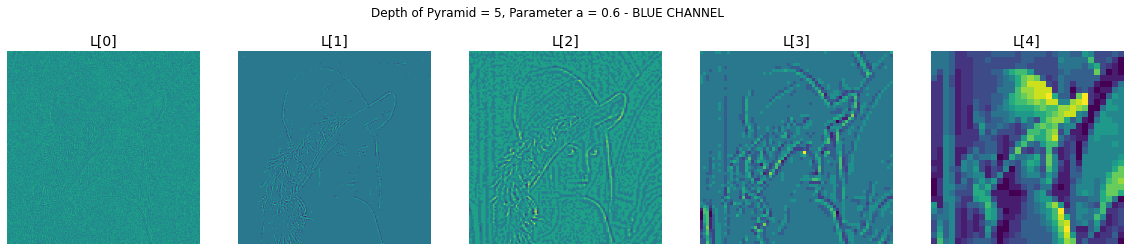

In [ ]:
quant_color_pyr1 = plot_quantized_pyramid(image = lena_color, a = 0.6, depth = 5, bins = bins1)
color_experiments = []

Image Distorted!
Quantizing with 15 bins:  Entropy =  1.9655 , Variance of Histogram =  0.0071


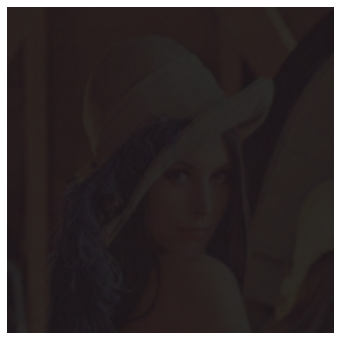

In [ ]:
retrieved_color1 = compare_to_original(lena_color, quant_color_pyr1, a = 0.6)
color_experiments.append(retrieved_color1)

hist = np.zeros([256,1], np.float64)
for pyramid in quant_color_pyr1:
  temp = histogram(pyramid, 5)
  hist = hist + temp
hist = hist / 3
entropy = entropy_calc(hist)
print('Quantizing with 15 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

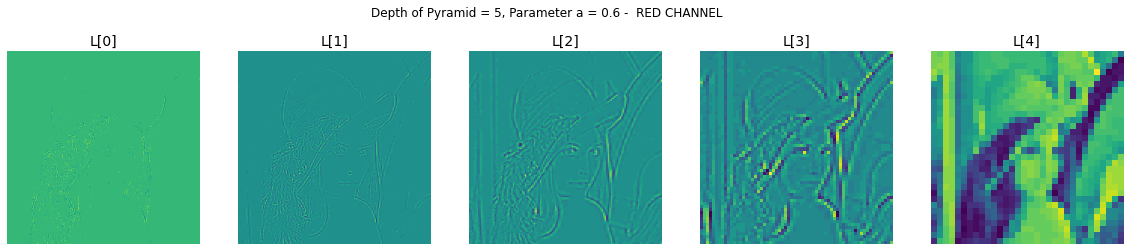

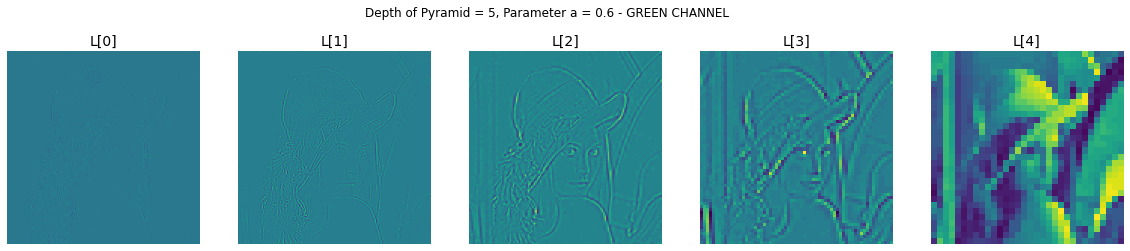

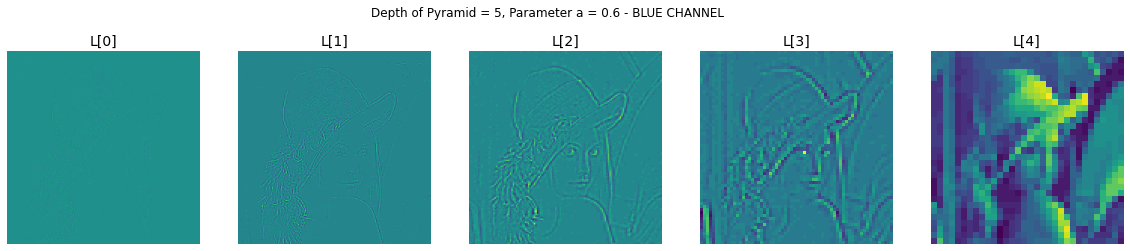

In [ ]:
quant_color_pyr2 = plot_quantized_pyramid(image = lena_color, a = 0.6, depth = 5, bins = bins2)

Image Distorted!
Quantizing with 50 bins:  Entropy =  1.5366 , Variance of Histogram =  0.0041


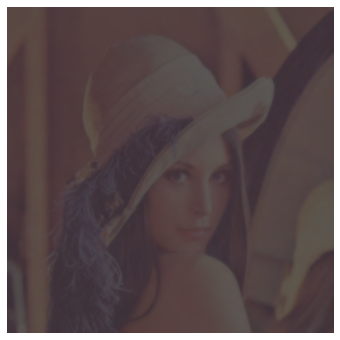

In [ ]:
retrieved_color2 = compare_to_original(lena_color, quant_color_pyr2, a = 0.6)
color_experiments.append(retrieved_color2)

hist = np.zeros([256,1], np.float64)
for pyramid in quant_color_pyr2:
  temp = histogram(pyramid, 5)
  hist = hist + temp
hist = hist / 3
entropy = entropy_calc(hist)
print('Quantizing with 50 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

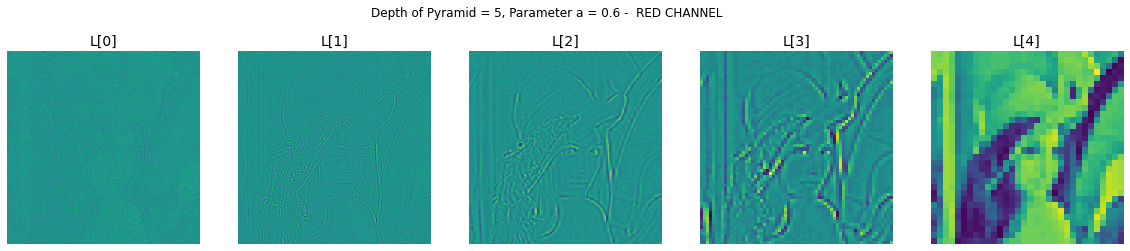

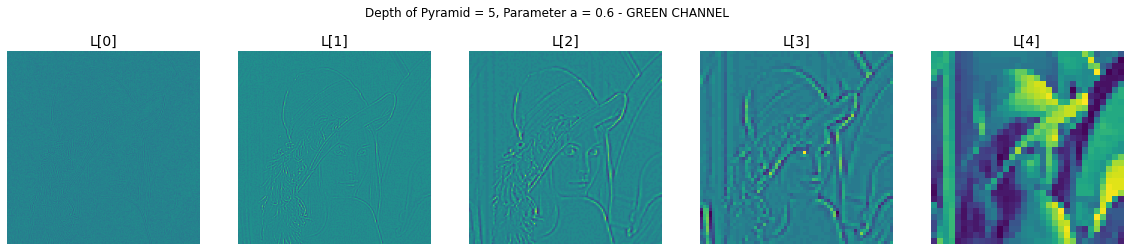

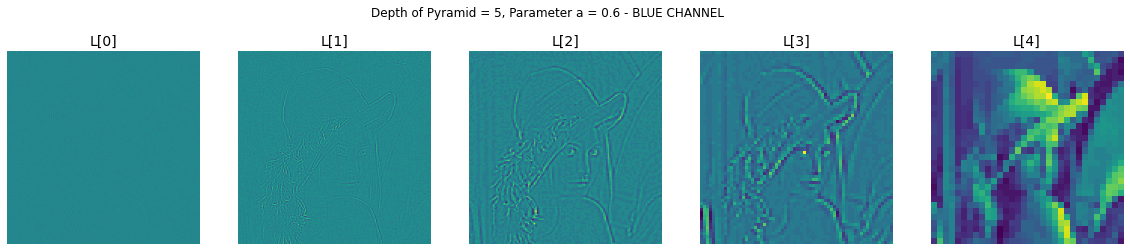

In [ ]:
quant_color_pyr3 = plot_quantized_pyramid(image = lena_color, a = 0.6, depth = 5, bins = bins3)

Image Distorted!
Quantizing with 150 bins:  Entropy =  2.3155 , Variance of Histogram =  0.0067


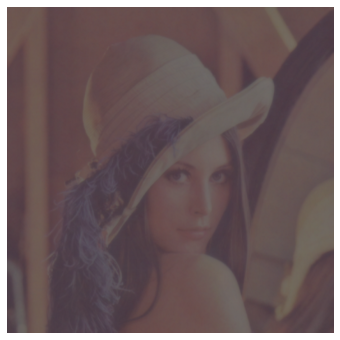

In [ ]:
retrieved_color3 = compare_to_original(lena_color, quant_color_pyr3, a = 0.6)
color_experiments.append(retrieved_color3)

hist = np.zeros([256,1], np.float64)
for pyramid in quant_color_pyr3:
  temp = histogram(pyramid, 5)
  hist = hist + temp
hist = hist / 3
entropy = entropy_calc(hist)
print('Quantizing with 150 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

Τέλος, επαναλαμβάνουμε τη διαδικασία για τη γκρίζα εικόνα του cameraman.

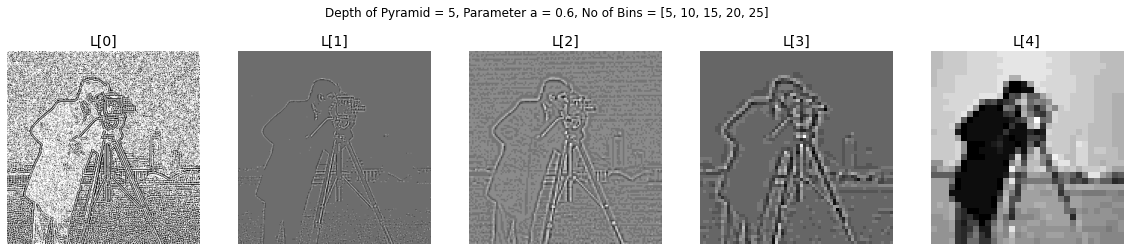

In [ ]:
quant_camera_pyr1 = plot_quantized_pyramid(image = camera, a = 0.6, depth = 5, bins = bins1)
camera_experiments = []

Image Distorted!
Quantizing with 5 bins:  Entropy =  1.9267 , Variance of Histogram =  0.0053


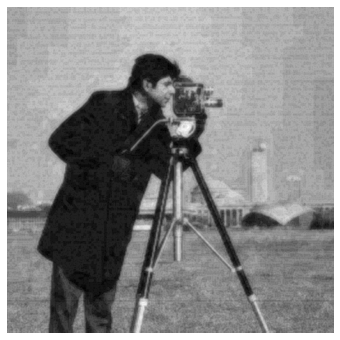

In [ ]:
retrieved_camera1 = compare_to_original(camera, quant_camera_pyr1, a = 0.6)
camera_experiments.append(retrieved_camera1)

hist = histogram(quant_camera_pyr1, 5)
entropy = entropy_calc(hist)
print('Quantizing with 5 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

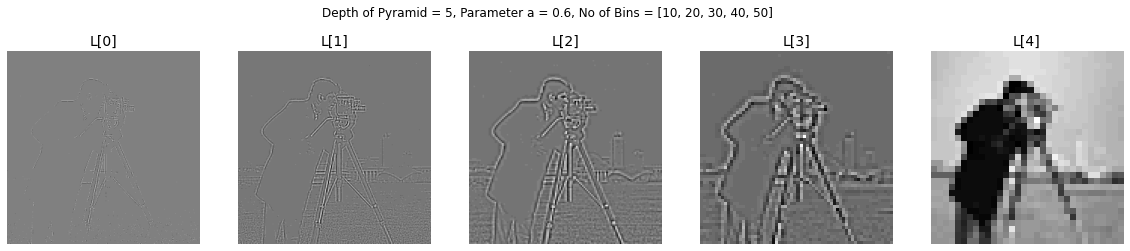

In [ ]:
quant_camera_pyr2 = plot_quantized_pyramid(image = camera, a = 0.6, depth = 5, bins = bins2)

Image Distorted!
Quantizing with 25 bins:  Entropy =  1.4893 , Variance of Histogram =  0.004


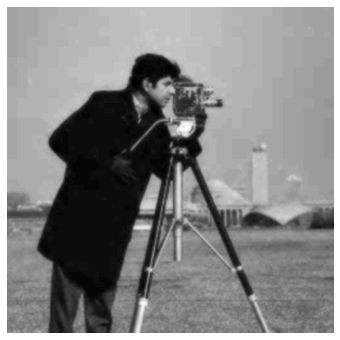

In [ ]:
retrieved_camera2 = compare_to_original(camera, quant_camera_pyr2, a = 0.6)
camera_experiments.append(retrieved_camera2)

hist = histogram(quant_camera_pyr2, 5)
entropy = entropy_calc(hist)
print('Quantizing with 25 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

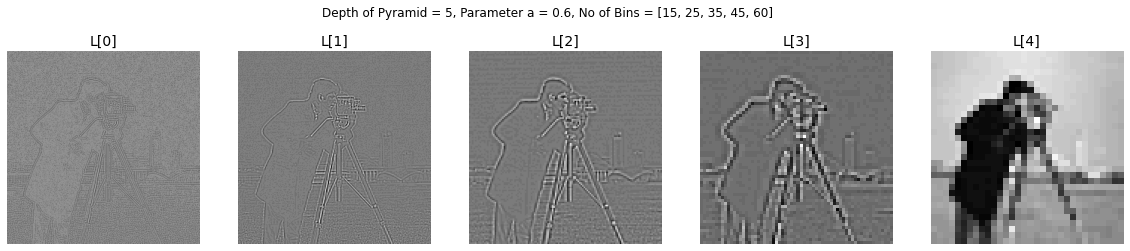

In [ ]:
quant_camera_pyr3 = plot_quantized_pyramid(image = camera, a = 0.6, depth = 5, bins = bins3)

Image Distorted!
Quantizing with 50 bins:  Entropy =  2.2344 , Variance of Histogram =  0.005


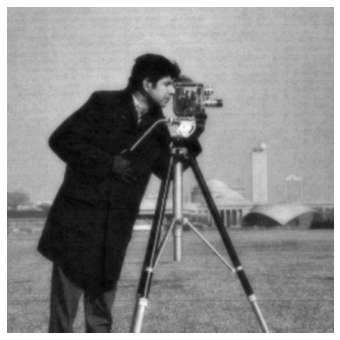

In [ ]:
retrieved_camera3 = compare_to_original(camera, quant_camera_pyr3, a = 0.6)
camera_experiments.append(retrieved_camera3)

hist = histogram(quant_camera_pyr3, 5)
entropy = entropy_calc(hist)
print('Quantizing with 50 bins:',' Entropy = ',np.round(entropy, 4),', Variance of Histogram = ', np.round(np.var(hist), 4))

Παρατηρούμε, λοιπόν, ότι όσο μικρότερος είναι ο αριθμός των bins που χρησιμοποιούμε για την κβάντιση των εικόνων, τόσο μεγαλύτερο είναι και το σφάλμα κβάντισης που υπεισέρχεται. Ωστόσο, η κβάντιση των εικόνων με λίγα bins συμβάλλει αισθητά στη μείωση της εντροπίας, άρα και στην κωδικοποίηση των εικόνων με λιγότερα bits. Έτσι, μπορούμε να χρησιμοποιήσουμε έναν αριθμό από bins τέτοιο, ώστε να ελαττώνεται αισθητά η εντροπία και συγχρόνως να μην γίνονται αντιληπτές από γυμνό μάτι οι αλλοιώσεις στην ποιότητα της εικόνας.

ζ) Τέλος, υπολογίζουμε και σχολιάζουμε το SNR της αρχικής και των ανακατασκευασμένων της εικόνων (τις 3 διαφορετικές εικόνες που προέκυψαν από τα 3 διαφορετικά πειράματα), για κάθε εικόνα ( Lena και camera).


In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def evaluate_experiments(image, experiments):
  for i in range(len(experiments)):
    print('Experiment No ',str(i+1),': PSNR = ', np.round(PSNR(image, experiments[i]), 4),' dB' )

In [ ]:
print('Grayscale Lena Image:\n')
evaluate_experiments(lena_gray, lena_experiments)

Grayscale Lena Image:

Experiment No  1 : PSNR =  27.8661  dB
Experiment No  2 : PSNR =  28.0338  dB
Experiment No  3 : PSNR =  27.735  dB


In [ ]:
print('Coloured Lena Image:\n')
evaluate_experiments(lena_color.astype(np.float64), color_experiments)

Coloured Lena Image:

Experiment No  1 : PSNR =  7.3411  dB
Experiment No  2 : PSNR =  10.5867  dB
Experiment No  3 : PSNR =  12.1772  dB


In [ ]:
print('Grayscale Camera Image:\n')
evaluate_experiments(camera, camera_experiments)

Grayscale Camera Image:

Experiment No  1 : PSNR =  28.5911  dB
Experiment No  2 : PSNR =  27.4046  dB
Experiment No  3 : PSNR =  27.5811  dB


Σύμφωνα και με το paper των δύο επιστημόνων, το μέγεθος των bins σε ένα επίπεδο της Λαπλασιανής Πυραμίδας, εκφράζει την ευαισθησία ενός ανθρώπινου παρατηρητή σε σφάλματα εντός ζωνών χωρικής συχνότητας. Το ανθρώπινο μάτι, εν γένει, είναι περισσότερο ευαίσθητο σε μεταβολές χαμηλής ή μεσαίας χωρικής συχνότητας, αλλά όχι τόσο σε αντίστοιχες μεταβολές υψηλής συχνότητας. Για τον λόγο αυτό, επιλέγουμε το bin size για την κβάντιση των εικόνων να αυξάνεται στα μεγαλύτερα επίπεδα της πυραμίδας. Στα θετικά της υπόθεσης, τα pixel των επιπέδων αυτών δεν συνεισφέρουν σημαντικά στο συνολικό bit rate της εικόνας, λόγω της χαμηλής τους πυκνότητας σε δείγματα.<br>
Παρατηρούμε, δε, ότι η η αρχική εικόνα ανακατασκευάζεται ελαφρώς αλλοιωμένη, λόγω σφαλμάτων κβάντισης,  όχι τόσο όμως ώστε να μην γίνεται αντιληπτή από τον μέσο άνθρωπο (κάτι τέτοιο υποδηλώνεται και από τις ικανοποιητικές τιμές του PSNR γύρω των 30 dB). Βέβαια, τα σφάλματα κβάντισης επηρεάζουν περισσότερο την έγχρωμη εικόνα, καθώς δεν μεταβάλλεται μόνο το απεικονιζόμενο σχήμα, αλλά και η φωτεινότητα. Ως κύριο πλεονέκτημα της κβάντισης, βέβαια, παραμένει η  συνεισφορά της στην ελάττωση της συνολικής εντροπίας της εικόνας, άρα και της κωδικοποίησης με λιγότερα bits.